In [ ]:
!pip install python-graphblas[default]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.9/350.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector, Scalar
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring
import networkx as nx

# **PageRank**

Используя python-graphblas реализовать функцию PageRank с параметрами из лекции.  Добавить необходимые тесты и небольшие примеры.

In [ ]:
def PageRank(A, damping=0.85, itermax=100, tol=1e-4):
  n = A.nrows
  A << A.apply(unary.one) # requires binary input graph
  teleport = (1 - damping) / n
  rdiff = 1  # first iteration is always done
  ri = Vector(dtypes.FP32, n)
  rj = Vector(dtypes.FP32, n)
  # Начальная иницализация
  rj[:] << 1 / n
  # Вычисление исходящей степени узлов
  d_out = A.reduce_rowwise(monoid.plus).new()
  d = d_out.dup(dtype="FP32")
  d(accum=binary.truediv)[:] << damping # prescale with damping factor
  # pagerank iterations
  for i in range(itermax):
        if rdiff <= tol:
            break
        # переприсвоим значение
        ri = rj
        # реализация формулы для расчета
        w = Vector(dtypes.FP32, n)
        w << ri.ewise_mult(d, binary.truediv)
        rj = A.T.mxv(w, semiring.plus_second) + teleport
        t = abs(rj - ri)
        rdiff = t.reduce(monoid.plus)
  return rj


# **Тестирование**
Будем сравнивать полученные значения со значениями из networkx.

**Test 1**

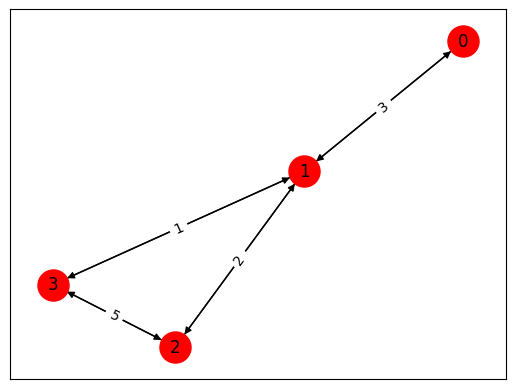

In [ ]:
data = [
    [0, 1, 1, 2, 2, 3, 1, 3],
    [1, 0, 2, 1, 3, 1, 3, 2],
    [3, 3, 2, 2, 5, 1, 1, 5],
]
rows, cols, weights = data
M1 = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(M1)

In [ ]:
PageRank(M1)

gb.VectorExpression                                         size  dtype
v_782.apply(binary.plus[FP64], right=0.037500000000000006)     4   FP64

"Result"   nvals  size  dtype
gb.Vector      4     4   FP64
-----------------------------
index         0         1         2         3
value  0.141401  0.366752  0.245923  0.245923

Do expr.new() or other << expr to calculate the expression.

In [ ]:
g1 = gb.io.to_networkx(M1)
nx.pagerank(g1, alpha=0.85, max_iter =100, tol=1e-4)

{0: 0.14143975470343678,
 1: 0.3666675305315227,
 2: 0.24594635738252024,
 3: 0.24594635738252024}

**Test 2**

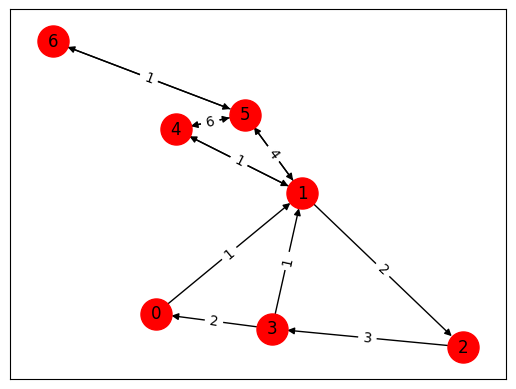

In [ ]:
data = [
  [1, 2, 3, 1, 4, 5, 5, 5, 4, 1, 6, 0, 3],
  [2, 3, 0, 4, 5, 1, 6, 4, 1, 5, 5, 1, 1],
  [2, 3, 2, 5, 6, 4, 1, 6, 1, 4, 1, 1, 1],
]
rows, cols, weights = data
M2 = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(M2)

In [ ]:
PageRank(M2)

gb.VectorExpression                                         size  dtype
v_872.apply(binary.plus[FP64], right=0.021428571428571432)     7   FP64

"Result"   nvals  size  dtype
gb.Vector      7     7   FP64
-----------------------------
index         0         1         2         3         4         5         6
value  0.064331  0.254546  0.093552  0.100945  0.160759  0.237232  0.088635

Do expr.new() or other << expr to calculate the expression.

In [ ]:
g2 = gb.io.to_networkx(M2)
nx.pagerank(g2, alpha=0.85, max_iter =100, tol=1e-4)

{0: 0.06433048002682992,
 1: 0.2545381806379269,
 2: 0.09356233420647174,
 4: 0.1607304891319006,
 5: 0.2373061386674685,
 3: 0.100935650975402,
 6: 0.08859672635400029}

**Test 3**

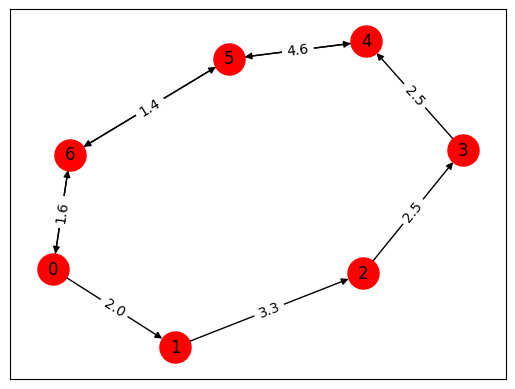

In [ ]:
data = [
  [0, 1, 2, 3, 4, 5, 6, 0, 6, 5],
  [1, 2, 3, 4, 5, 6, 0, 6, 5, 4],
  [2.0, 3.3, 2.5, 2.5, 4.6, 1.4, 1.6, 1.6, 1.4, 4.6],
]
rows, cols, weights = data
M3 = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(M3)

In [ ]:
PageRank(M3)

gb.VectorExpression                                          size  dtype
v_1002.apply(binary.plus[FP64], right=0.021428571428571432)     7   FP64

"Result"   nvals  size  dtype
gb.Vector      7     7   FP64
-----------------------------
index         0         1         2         3         4         5         6
value  0.099083  0.063533  0.075437  0.085545  0.213307  0.280402  0.182694

Do expr.new() or other << expr to calculate the expression.

In [ ]:
g3 = gb.io.to_networkx(M3)
nx.pagerank(g3, alpha=0.85, max_iter =100, tol=1e-4)

{0: 0.0990775053717801,
 1: 0.06355194727745743,
 6: 0.18270337398402042,
 2: 0.07541498344436291,
 3: 0.08557247019862514,
 4: 0.21323427211927534,
 5: 0.2804454476044787}